In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [10]:
x.shape

(1000, 5)

In [11]:
x.shape[1]

5

## Defining the model structure

In [12]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1536      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=600)

## Training the model

In [16]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/500
720/720 [==============================] - 1s 1ms/sample - loss: 0.6808 - accuracy: 0.5681 - val_loss: 0.5381 - val_accuracy: 0.9250
Epoch 2/500
720/720 [==============================] - 0s 75us/sample - loss: 0.4858 - accuracy: 0.9417 - val_loss: 0.3833 - val_accuracy: 0.9500
Epoch 3/500
720/720 [==============================] - 0s 89us/sample - loss: 0.3557 - accuracy: 0.9500 - val_loss: 0.2787 - val_accuracy: 0.9500
Epoch 4/500
720/720 [==============================] - 0s 85us/sample - loss: 0.2653 - accuracy: 0.9569 - val_loss: 0.2100 - val_accuracy: 0.9625
Epoch 5/500
720/720 [==============================] - 0s 78us/sample - loss: 0.2109 - accuracy: 0.9569 - val_loss: 0.1657 - val_accuracy: 0.9625
Epoch 6/500
720/720 [==============================] - 0s 78us/sample - loss: 0.1730 - accuracy: 0.9639 - val_loss: 0.1365 - val_accuracy: 0.9750
Epoch 7/500
720/720 [==============================] - 0s 78us/sample - loss: 0.

720/720 [==============================] - 0s 83us/sample - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.0645 - val_accuracy: 0.9750
Epoch 57/500
720/720 [==============================] - 0s 80us/sample - loss: 0.0705 - accuracy: 0.9792 - val_loss: 0.0663 - val_accuracy: 0.9750
Epoch 58/500
720/720 [==============================] - 0s 82us/sample - loss: 0.0701 - accuracy: 0.9792 - val_loss: 0.0660 - val_accuracy: 0.9750
Epoch 59/500
720/720 [==============================] - 0s 82us/sample - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.0667 - val_accuracy: 0.9750
Epoch 60/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0693 - accuracy: 0.9778 - val_loss: 0.0656 - val_accuracy: 0.9750
Epoch 61/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0657 - accuracy: 0.9792 - val_loss: 0.0662 - val_accuracy: 0.9750
Epoch 62/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.0665 - val_a

Epoch 112/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0657 - val_accuracy: 0.9750
Epoch 113/500
720/720 [==============================] - 0s 72us/sample - loss: 0.0618 - accuracy: 0.9792 - val_loss: 0.0670 - val_accuracy: 0.9750
Epoch 114/500
720/720 [==============================] - 0s 71us/sample - loss: 0.0638 - accuracy: 0.9792 - val_loss: 0.0663 - val_accuracy: 0.9750
Epoch 115/500
720/720 [==============================] - 0s 71us/sample - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0683 - val_accuracy: 0.9750
Epoch 116/500
720/720 [==============================] - 0s 74us/sample - loss: 0.0617 - accuracy: 0.9792 - val_loss: 0.0701 - val_accuracy: 0.9750
Epoch 117/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0608 - accuracy: 0.9792 - val_loss: 0.0699 - val_accuracy: 0.9750
Epoch 118/500
720/720 [==============================] - 0s 80us/sample - loss: 0.0607 - accuracy: 0.9778 - val_

720/720 [==============================] - 0s 75us/sample - loss: 0.0600 - accuracy: 0.9778 - val_loss: 0.0763 - val_accuracy: 0.9750
Epoch 168/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0576 - accuracy: 0.9792 - val_loss: 0.0744 - val_accuracy: 0.9750
Epoch 169/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0760 - val_accuracy: 0.9625
Epoch 170/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0595 - accuracy: 0.9792 - val_loss: 0.0762 - val_accuracy: 0.9625
Epoch 171/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0782 - val_accuracy: 0.9625
Epoch 172/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.0784 - val_accuracy: 0.9750
Epoch 173/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0573 - accuracy: 0.9806 - val_loss: 0.0795 -

720/720 [==============================] - 0s 82us/sample - loss: 0.0502 - accuracy: 0.9861 - val_loss: 0.0862 - val_accuracy: 0.9625
Epoch 223/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0870 - val_accuracy: 0.9625
Epoch 224/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0554 - accuracy: 0.9819 - val_loss: 0.0873 - val_accuracy: 0.9625
Epoch 225/500
720/720 [==============================] - 0s 344us/sample - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0896 - val_accuracy: 0.9625
Epoch 226/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0523 - accuracy: 0.9847 - val_loss: 0.0891 - val_accuracy: 0.9625
Epoch 227/500
720/720 [==============================] - 0s 85us/sample - loss: 0.0544 - accuracy: 0.9833 - val_loss: 0.0918 - val_accuracy: 0.9625
Epoch 228/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.0902 

720/720 [==============================] - 0s 76us/sample - loss: 0.0480 - accuracy: 0.9861 - val_loss: 0.0923 - val_accuracy: 0.9750
Epoch 277/500
720/720 [==============================] - 0s 83us/sample - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0910 - val_accuracy: 0.9750
Epoch 278/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0496 - accuracy: 0.9833 - val_loss: 0.0919 - val_accuracy: 0.9750
Epoch 279/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0543 - accuracy: 0.9847 - val_loss: 0.0932 - val_accuracy: 0.9750
Epoch 280/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0508 - accuracy: 0.9819 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 281/500
720/720 [==============================] - 0s 68us/sample - loss: 0.0502 - accuracy: 0.9861 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 282/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0927 -

720/720 [==============================] - 0s 85us/sample - loss: 0.0502 - accuracy: 0.9833 - val_loss: 0.0990 - val_accuracy: 0.9625
Epoch 332/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0493 - accuracy: 0.9833 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 333/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0449 - accuracy: 0.9875 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 334/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0481 - accuracy: 0.9861 - val_loss: 0.0955 - val_accuracy: 0.9750
Epoch 335/500
720/720 [==============================] - 0s 72us/sample - loss: 0.0459 - accuracy: 0.9875 - val_loss: 0.0932 - val_accuracy: 0.9750
Epoch 336/500
720/720 [==============================] - 0s 79us/sample - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0923 - val_accuracy: 0.9750
Epoch 337/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0934 -

720/720 [==============================] - 0s 78us/sample - loss: 0.0449 - accuracy: 0.9833 - val_loss: 0.1019 - val_accuracy: 0.9625
Epoch 387/500
720/720 [==============================] - 0s 75us/sample - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.1034 - val_accuracy: 0.9625
Epoch 388/500
720/720 [==============================] - 0s 76us/sample - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.1028 - val_accuracy: 0.9625
Epoch 389/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0446 - accuracy: 0.9847 - val_loss: 0.1022 - val_accuracy: 0.9625
Epoch 390/500
720/720 [==============================] - 0s 79us/sample - loss: 0.0442 - accuracy: 0.9875 - val_loss: 0.1031 - val_accuracy: 0.9625
Epoch 391/500
720/720 [==============================] - 0s 79us/sample - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.1042 - val_accuracy: 0.9625
Epoch 392/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0442 - accuracy: 0.9875 - val_loss: 0.1039 -

720/720 [==============================] - 0s 78us/sample - loss: 0.0413 - accuracy: 0.9903 - val_loss: 0.1049 - val_accuracy: 0.9625
Epoch 441/500
720/720 [==============================] - 0s 82us/sample - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.1055 - val_accuracy: 0.9625
Epoch 442/500
720/720 [==============================] - 0s 83us/sample - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.1052 - val_accuracy: 0.9625
Epoch 443/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0446 - accuracy: 0.9833 - val_loss: 0.1057 - val_accuracy: 0.9625
Epoch 444/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0434 - accuracy: 0.9833 - val_loss: 0.1044 - val_accuracy: 0.9625
Epoch 445/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.1057 - val_accuracy: 0.9625
Epoch 446/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.1057 -

720/720 [==============================] - 0s 79us/sample - loss: 0.0436 - accuracy: 0.9875 - val_loss: 0.1099 - val_accuracy: 0.9625
Epoch 496/500
720/720 [==============================] - 0s 81us/sample - loss: 0.0392 - accuracy: 0.9861 - val_loss: 0.1120 - val_accuracy: 0.9625
Epoch 497/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.1126 - val_accuracy: 0.9625
Epoch 498/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0409 - accuracy: 0.9903 - val_loss: 0.1119 - val_accuracy: 0.9625
Epoch 499/500
720/720 [==============================] - 0s 78us/sample - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.1130 - val_accuracy: 0.9625
Epoch 500/500
720/720 [==============================] - 0s 86us/sample - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1145 - val_accuracy: 0.9625


## Testing & evaluating the model

In [17]:
y_pred = model.predict(x_test)
y_pred

array([[9.99999881e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.44887109e-04],
       [8.16524625e-01],
       [5.86259775e-02],
       [1.00000000e+00],
       [3.66207073e-03],
       [1.00000000e+00],
       [6.12077583e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.07480539e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.20849037e-04],
       [1.00000000e+00],
       [2.99937371e-03],
       [9.99999881e-01],
       [1.00000000e+00],
       [2.33105151e-03],
       [4.17917501e-03],
       [1.00000000e+00],
       [1.08614971e-03],
       [3.89616238e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.52272254e-02],
       [7.16872334e-01],
       [4.07402776e-02],
       [9.99999881e-01],
       [1.00000000e+00],
       [4.55144700e-03],
       [3.69915296e-03],
       [7.34466016e-01],
       [1.00000000e+00],
       [1.00000000e+00],


In [18]:
y_pred = model.predict_classes(x_test)
y_pred

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [19]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [20]:
model.evaluate(x_test, y_test)

200/200 [==============================] - 0s 105us/sample - loss: 0.2320 - accuracy: 0.9450


[0.23197524771094322, 0.945]

In [21]:
model.predict(x_test)[50]

array([1.], dtype=float32)

In [22]:
model.predict_classes(x_test)[50]

array([1])

In [23]:
y_test.iloc[50]

1

In [24]:
model.predict(x_test)[70]

array([1.], dtype=float32)

In [25]:
model.predict_classes(x_test)[70]

array([1])

In [26]:
y_test.iloc[70]

1

In [27]:
model.predict(sc.transform([[65.000200, 36, 55000, 180, 1]]))

array([[0.9307335]], dtype=float32)

## Visualize Loss

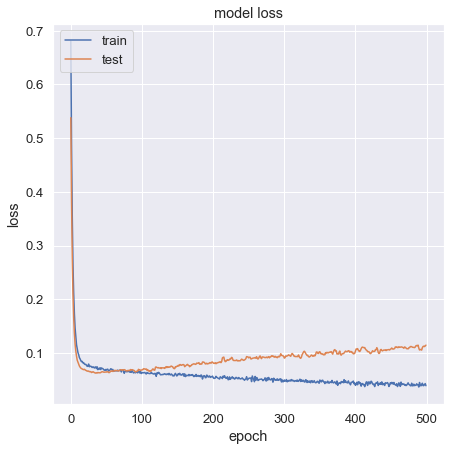

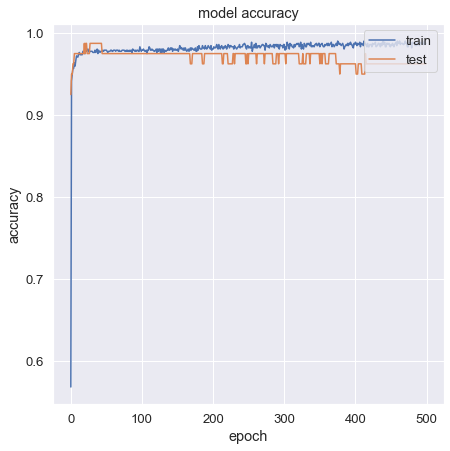

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**as you can see the val_loss start to increase at =~ 80 so retrain using epochs == 80**

## Saving the model

In [29]:
model.save('model.h5')

In [30]:
import joblib

In [31]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

## Loding Model

In [32]:
sc = joblib.load('scaler.pkl')

In [35]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict_classes(sc.transform([[65.000200, 36, 55000, 260, 0]]))

array([[0]])

# Great Work!